In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

In [2]:
path = "/Users/claudiavicentecomorera/Desktop/TFG/Data/RNA_seq/"

hippocampus = pd.read_csv(os.path.join(path, "gene_tpm_brain_hippocampus.gct"), index_col = 2, skiprows = 2, sep = '\t')
breast = pd.read_csv(os.path.join(path, "gene_tpm_breast_mammary_tissue.gct"), index_col = 2, skiprows = 2, sep = '\t')
lung = pd.read_csv(os.path.join(path, "gene_tpm_lung.gct"), index_col = 2, skiprows = 2, sep = '\t')
skmuscle = pd.read_csv(os.path.join(path, "gene_tpm_muscle_skeletal.gct"), index_col = 2, skiprows = 2, sep = '\t')
hippocampus = hippocampus.iloc[:, 2:]
breast = breast.iloc[:, 2:]
lung = lung.iloc[:, 2:]
skmuscle = skmuscle.iloc[:, 2:]

In [3]:
log_hippocampus = np.log2(hippocampus + 1)
log_breast = np.log2(breast + 1)
log_lung = np.log2(lung + 1)
log_skmuscle = np.log2(skmuscle + 1)

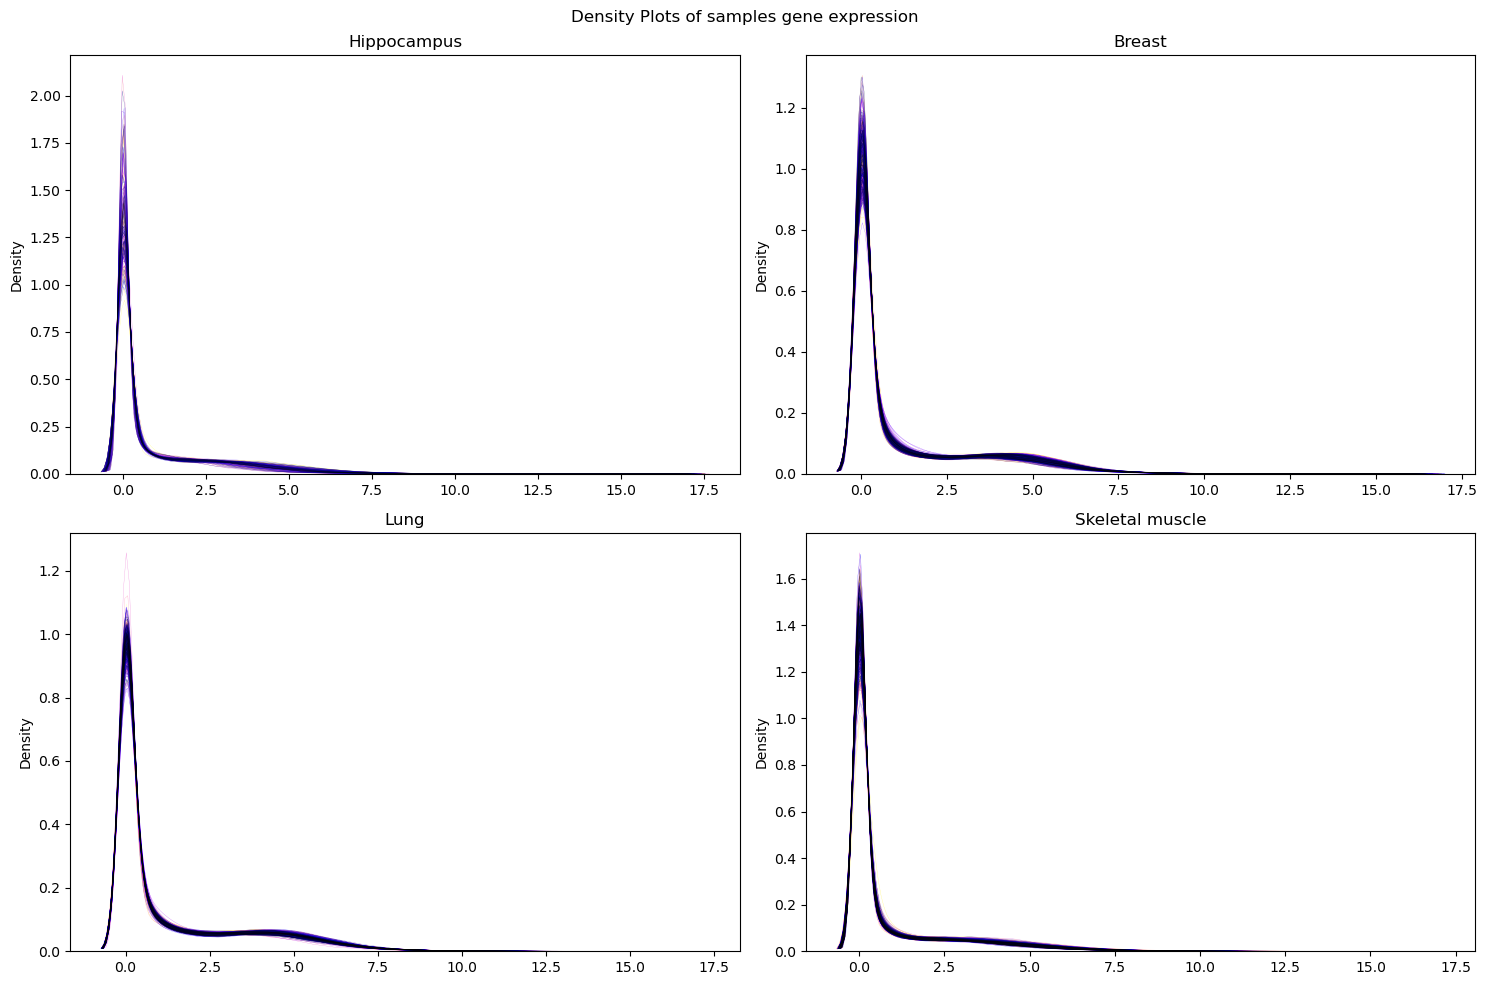

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.kdeplot(data = log_hippocampus, ax = axes[0,0], common_norm = False, legend = False, palette = "gnuplot2", linewidth = .2, alpha = .6)
axes[0,0].set_title('Hippocampus')

sns.kdeplot(data = log_breast, ax = axes[0,1], common_norm = False, legend = False, palette = "gnuplot2", linewidth = .2, alpha = .6)
axes[0,1].set_title('Breast')

sns.kdeplot(data = log_lung, ax = axes[1,0], common_norm = False, legend = False, palette = "gnuplot2", linewidth = .2, alpha = .6)
axes[1,0].set_title('Lung')

sns.kdeplot(data = log_skmuscle, ax = axes[1,1], common_norm = False, legend = False, palette = "gnuplot2", linewidth = .2, alpha = .6)
axes[1,1].set_title('Skeletal muscle')

plt.suptitle('Density Plots of samples gene expression')
plt.tight_layout()

In [5]:
df = pd.concat([log_hippocampus, log_breast, log_lung, log_skmuscle], axis = 1)
df

,GTEX-11DXW-0011-R1a-SM-DNZZD,GTEX-11EI6-0011-R1a-SM-DO93L,GTEX-11GS4-0011-R1a-SM-DO129,GTEX-11GSO-0011-R1b-SM-57WD3,GTEX-11GSP-0011-R1a-SM-9QEJ3,GTEX-11ONC-0011-R1a-SM-57WD4,GTEX-11TUW-0011-R1a-SM-DO92S,GTEX-11UD1-0011-R1b-SM-5BC7D,GTEX-11WQC-0011-R1b-SM-DO932,GTEX-11ZTS-0011-R1a-SM-5BC71,...,GTEX-ZY6K-2026-SM-5GZXQ,GTEX-ZYFC-0526-SM-5GIDF,GTEX-ZYFD-0326-SM-5NQ8I,GTEX-ZYFG-2426-SM-5GIE8,GTEX-ZYT6-1626-SM-5E45R,GTEX-ZYW4-0526-SM-5GZZ5,GTEX-ZYY3-0526-SM-5E45G,GTEX-ZZ64-1526-SM-5E43K,GTEX-ZZPT-0626-SM-5GZXT,GTEX-ZZPU-2626-SM-5E45Y
Description,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.000000,0.018492,0.021906,0.000000,0.020769,0.027437,0.000000,0.000000,0.039419,0.000000,...,0.055890,0.030972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039840,0.028145
WASH7P,0.826193,1.365693,1.588805,1.364012,1.117030,0.866077,1.123666,3.057277,1.889474,0.779806,...,2.271127,1.559737,0.975043,1.175045,0.651591,1.166715,1.351628,1.495183,2.202888,0.902730
MIR6859-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MIR1302-2HG,0.035905,0.000000,0.085425,0.000000,0.000000,0.000000,0.000000,0.000000,0.077653,0.000000,...,0.037453,0.061154,0.000000,0.000000,0.000000,0.000000,0.051859,0.000000,0.152638,0.000000
FAM138A,0.000000,0.000000,0.061154,0.000000,0.000000,0.000000,0.027862,0.000000,0.028003,0.000000,...,0.026729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,13.194757,13.286558,13.199979,12.857787,13.795735,14.041402,13.355489,13.053587,14.092675,13.426658,...,12.686719,13.832791,13.014892,14.594033,12.805744,14.113172,12.813380,14.162785,11.768598,14.263049
MT-TE,4.647315,5.579542,5.066950,7.640245,6.310885,5.571070,4.982309,4.647890,5.700994,5.956521,...,4.102658,5.640679,4.414812,6.620146,2.985136,5.820945,4.438293,6.178715,2.723559,5.908573
MT-CYB,14.942652,15.002332,14.930691,15.178003,15.227729,15.314194,15.103739,14.991743,15.185379,14.701902,...,14.669051,14.707305,14.952696,15.168241,14.894676,14.373205,14.801254,14.921423,14.814332,15.162352


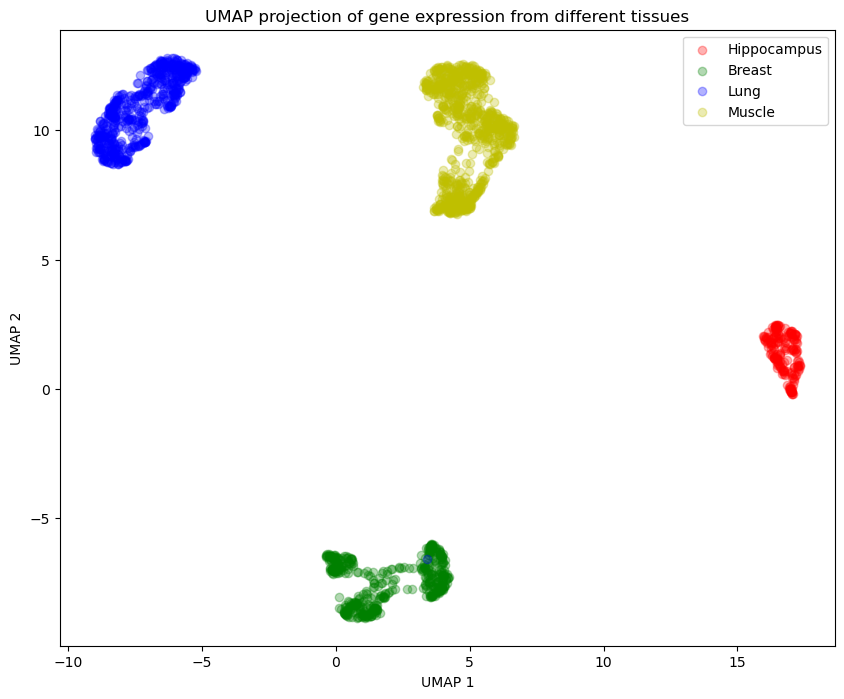

In [6]:
t_idx = np.cumsum([len(log_hippocampus.columns), len(log_breast.columns), len(log_lung.columns), len(log_skmuscle.columns)])
t_labels = ['Hippocampus', 'Breast', 'Lung', 'Muscle']
colors = ['r', 'g', 'b', 'y']

reducer = umap.UMAP()
embedding = reducer.fit_transform(df.T)

plt.figure(figsize=(10, 8))

for i, (start, end) in enumerate(zip([0] + list(t_idx), t_idx)):
    plt.scatter(embedding[start:end, 0], embedding[start:end, 1], color=colors[i], label=t_labels[i], alpha = .3)
plt.title('UMAP projection of gene expression from different tissues')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

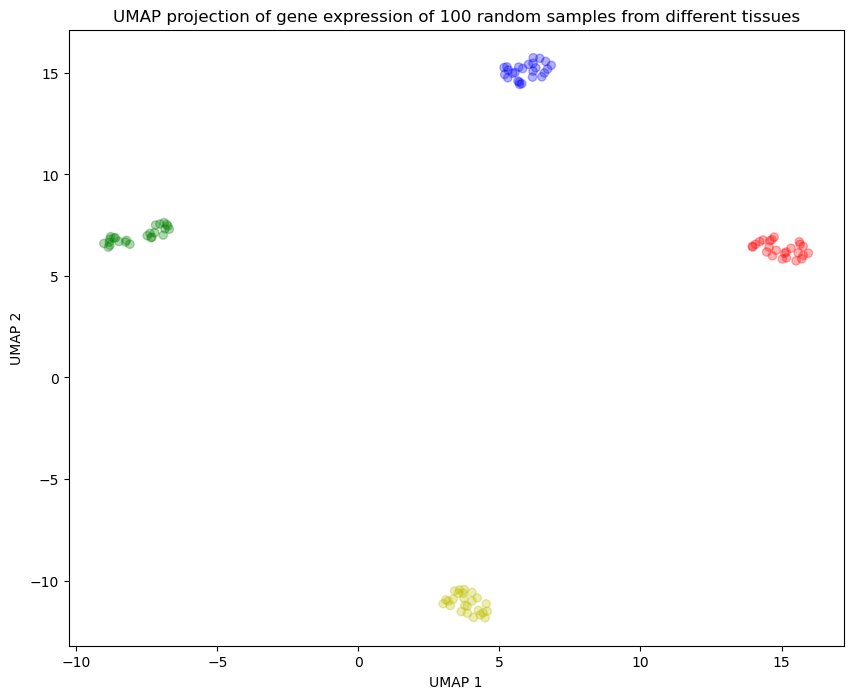

In [7]:
s_loghippocampus = log_hippocampus.sample(n=25, axis = 1, random_state=42)
s_logbreast = log_breast.sample(n=25, axis = 1, random_state=42)
s_loglung = log_lung.sample(n=25, axis = 1, random_state=42)
s_logskmuscle = log_skmuscle.sample(n=25, axis = 1, random_state=42)

s_df = pd.concat([s_loghippocampus, s_logbreast, s_loglung, s_logskmuscle], axis = 1)

embedding = reducer.fit_transform(s_df.T)
colors = ['r'] * 25 + ['g'] * 25 + ['b'] * 25 + ['y'] * 25

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, alpha = .3)
plt.title('UMAP projection of gene expression of 100 random samples from different tissues')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [8]:
df = pd.concat([hippocampus, breast, lung, skmuscle], axis = 1)
df[s_df.columns].to_csv('/Users/claudiavicentecomorera/Desktop/TFG/Data/RNA_seq/bulk_data100.csv')
df[s_df.columns]

,GTEX-1HR98-0011-R1a-SM-ARZLQ,GTEX-1EMGI-0011-R1b-SM-9OSWZ,GTEX-12WSM-0011-R1a-SM-5LZW6,GTEX-15CHQ-0011-R1a-SM-COH27,GTEX-1LB8K-0011-R1b-SM-EZ6MV,GTEX-X585-0011-R1B-SM-46MVE,GTEX-14LLW-0011-R1a-SM-5ZZVD,GTEX-13SLW-0011-R1a-SM-5S2W7,GTEX-13112-0011-R1b-SM-5HL7K,GTEX-QVJO-0011-R1A-SM-2S1QI,...,GTEX-1HSMO-0526-SM-ACKXB,GTEX-1A8G7-0326-SM-72D5B,GTEX-13FHO-0726-SM-5IJDG,GTEX-16Z82-0126-SM-7DHLF,GTEX-1PIEJ-0326-SM-EVYB5,GTEX-13OVK-1926-SM-6M48G,GTEX-12WSH-2526-SM-5CVNH,GTEX-1F7RK-0326-SM-7RHH7,GTEX-Q2AH-1826-SM-2S1Q2,GTEX-11TT1-2326-SM-5GU6N
Description,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.0000,0.0318,0.0204,0.0000,0.0145,0.000,0.0000,0.0174,0.0137,0.0000,...,0.000,0.000,0.0203,0.0229,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
WASH7P,0.6312,1.6760,2.1730,2.0650,3.5160,2.313,1.0870,0.7247,1.1770,1.0990,...,2.318,1.241,1.7180,0.9841,0.9797,1.3040,0.7391,0.6724,1.802,0.6057
MIR6859-1,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,...,0.000,0.000,0.0000,0.0000,0.0000,0.5305,0.0000,0.0000,0.000,0.0000
MIR1302-2HG,0.1001,0.0317,0.0813,0.0333,0.0580,0.000,0.0407,0.0694,0.0000,0.0887,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0405,0.0279,0.000,0.0000
FAM138A,0.0237,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0396,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,10880.0000,6329.0000,14890.0000,6841.0000,5404.0000,4377.000,5365.0000,16420.0000,16050.0000,6480.0000,...,15460.000,4518.000,20150.0000,13300.0000,2545.0000,12480.0000,8074.0000,6415.0000,21660.000,13210.0000
MT-TE,34.7700,21.9100,153.0000,125.9000,12.7300,10.770,16.3300,52.3000,47.3700,17.8100,...,62.460,30.870,61.5600,45.9200,9.2570,37.1200,37.6000,24.4800,69.350,43.7200
MT-CYB,42020.0000,27920.0000,36590.0000,31830.0000,28370.0000,18980.000,17960.0000,37970.0000,46600.0000,32000.0000,...,29420.000,28230.000,32550.0000,28220.0000,32350.0000,44330.0000,29720.0000,40620.0000,27120.000,23190.0000


In [9]:
pd.DataFrame({
    'Sample_Name': s_df.columns, 
    'Cluster_Label': ["hippocampus"] * 25 + ["breast"] * 25 + ["lung"] * 25 + ["skmuscle"] * 25
}).to_csv('/Users/claudiavicentecomorera/Desktop/TFG/Data/RNA_seq/clabs_bulk100.csv')